In [4]:
import os, shutil

dir1 = r'/media/nabil/workspace1/projects/gsoc24/matplotlib/doc/gallery'
copy_dest = r'/media/nabil/workspace1/projects/gsoc24/tmp/search_test/images'

dir1_folders = [dir for dir in os.listdir(dir1) if os.path.isdir(os.path.join(dir1, dir))]

for dir in dir1_folders:
    dir2 = dir1 + f"/{dir}/images/"
    for file in os.listdir(dir2):
        if not os.path.isdir(os.path.join(dir2,file)) and file.split('.')[-1] == "png":
            print(file) 
            shutil.copy(os.path.join(dir2,file), copy_dest)

sphx_glr_animation_demo_001.png
sphx_glr_animation_demo_001_2_00x.png
sphx_glr_pause_resume_001.png
sphx_glr_pause_resume_001_2_00x.png
sphx_glr_demo_axes_rgb_001.png
sphx_glr_demo_fixed_size_axes_002_2_00x.png
sphx_glr_make_room_for_ylabel_using_axesgrid_001_2_00x.png
sphx_glr_simple_axesgrid2_001.png
sphx_glr_demo_anchored_direction_arrows_001.png
sphx_glr_demo_anchored_direction_arrows_001_2_00x.png
sphx_glr_demo_axes_divider_001.png
sphx_glr_demo_axes_divider_001_2_00x.png
sphx_glr_demo_axes_grid2_001.png
sphx_glr_demo_axes_grid2_001_2_00x.png
sphx_glr_demo_axes_grid_001.png
sphx_glr_demo_axes_grid_001_2_00x.png
sphx_glr_demo_axes_hbox_divider_001.png
sphx_glr_demo_axes_hbox_divider_001_2_00x.png
sphx_glr_demo_axes_hbox_divider_002.png
sphx_glr_demo_axes_hbox_divider_002_2_00x.png
sphx_glr_demo_axes_rgb_001_2_00x.png
sphx_glr_demo_axes_rgb_002.png
sphx_glr_demo_axes_rgb_002_2_00x.png
sphx_glr_demo_colorbar_with_axes_divider_001.png
sphx_glr_demo_colorbar_with_axes_divider_001_2_00x

In [45]:
from DeepImageSearch import Load_Data, Search_Setup

# Load images from a folder
image_list = Load_Data().from_folder(['./images/images2/'])

 # Set up the search engine, You can load 'vit_base_patch16_224_in21k', 'resnet50' etc more then 500+ models 
st = Search_Setup(image_list=image_list, model_name='resnet34', pretrained=True, image_count=None)

# Index the images
st.run_index()

# Get metadata
metadata = st.get_image_metadata_file()

# Add new images to the index
# st.add_images_to_index(['image_path_1', 'image_path_2'])

# Get similar images
# st.get_similar_images(image_path='./images/sphx_glr_axes_box_aspect_003_2_00x.png', number_of_images=10)

# Plot similar images


 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: resnet34
 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
 Meta data already Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.idx']


In [32]:
st.add_images_to_index(['images/1.png','images/2.png','images/3.png','images/4.png'])

100%|██████████| 4/4 [00:00<00:00, 10.05it/s]

 New images added to the index: 4


['./images/images2/sphx_glr_bar_colors_001.png', './images/images2/sphx_glr_demo_colorbar_with_inset_locator_001.png', './images/images2/sphx_glr_stairs_demo_002.png', './images/images2/sphx_glr_custom_ticker1_001.png', './images/images2/sphx_glr_subplots_adjust_001.png', './images/images2/sphx_glr_bar_colors_001_2_00x.png', './images/images2/sphx_glr_simple_axesgrid2_001.png', './images/images2/sphx_glr_demo_colorbar_with_inset_locator_001_2_00x.png', './images/images2/sphx_glr_xkcd_002_2_00x.png']


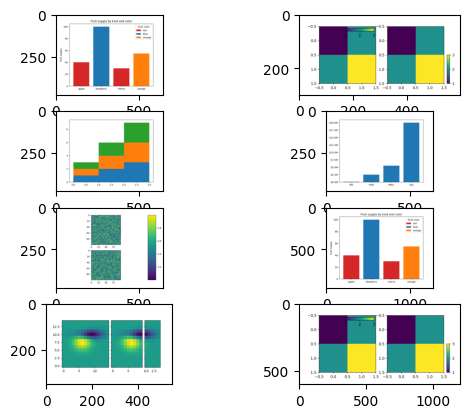

In [43]:
gg = st.get_similar_images(image_path='./images/6.png', number_of_images=9)

matches = list(gg.values())    
print(matches)
import matplotlib.pyplot as  plt

f, axarr = plt.subplots(4,2)
axarr[0,0].imshow(plt.imread(matches[0]))
axarr[0,1].imshow(plt.imread(matches[1]))
axarr[1,0].imshow(plt.imread(matches[2]))
axarr[1,1].imshow(plt.imread(matches[3]))

axarr[2,0].imshow(plt.imread(matches[4]))
axarr[2,1].imshow(plt.imread(matches[5]))

axarr[3,0].imshow(plt.imread(matches[6]))
axarr[3,1].imshow(plt.imread(matches[7]))


# Update metadata
metadata = st.get_image_metadata_file()

[('./images/images2/sphx_glr_secondary_axis_002_2_00x.png', 0.7598132538738996), ('./images/images2/sphx_glr_secondary_axis_002.png', 0.750320762109253), ('./images/images2/sphx_glr_categorical_variables_002_2_00x.png', 0.7255989823163429), ('./images/images2/sphx_glr_categorical_variables_002.png', 0.7238098608947489), ('./images/images2/sphx_glr_axes_box_aspect_004_2_00x.png', 0.7129557963716197)]


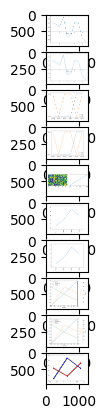

In [58]:
import numpy as np
def cosineSimilarity(A, B):
    cosine = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    return cosine


from PIL import Image

img = Image.open('./images/4.png')
feature = st._extract(img)

import  json
f = open('data.json')
data  = json.load(f)

names = []
coses = {}

for key, val in data.items():
    coses[key] = cosineSimilarity(val, feature)
    names.append((key, coses[key]))

i = np.argmax(coses.values())
gg = sorted(names, key=lambda x:x[1], reverse=True)
print(gg[:5])

f, ax = plt.subplots(10,1)
for i, (name, cos) in enumerate(gg[:10]):
    ax[i].imshow(plt.imread(name))


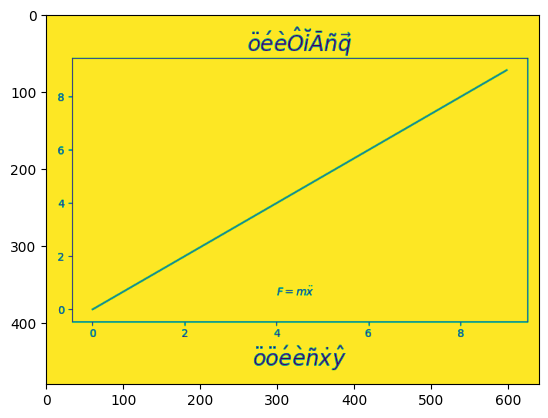

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('images/images2/sphx_glr_accented_text_001.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
ret,thresh = cv.threshold(image, 0, 1, 0)
plt.axes(None)
plt.imshow(image)

In [12]:
import numpy as np
import cv2 as cv
im = cv.imread('test.jpg')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

[ WARN:0@0.009] global loadsave.cpp:248 findDecoder imread_('test.jpg'): can't open/read file: check file path/integrity


AssertionError: file could not be read, check with os.path.exists()

In [3]:
import numpy as np
import cv2 as cv
 
img = cv.imread('images/images2/sphx_glr_align_ylabels_001_2_00x.png')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
 
img=cv.drawKeypoints(gray,kp,img)
 
cv.imwrite('sift_keypoints.jpg',img)

True

In [9]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread('images/1.png',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('images/2.png',cv.IMREAD_GRAYSCALE) # trainImage

print(img1)

# Initiate SIFT detector
# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

print(des1)

# # FLANN parameters
# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks=50) # or pass empty dictionary
 
# flann = cv.FlannBasedMatcher(index_params,search_params)
 
# matches = flann.knnMatch(des1,des2,k=2)

# print(matches)

# # Need to draw only good matches, so create a mask
# matchesMask = [[0,0] for i in range(len(matches))]
 
# # ratio test as per Lowe's paper
# for i,(m,n) in enumerate(matches):
#     if m.distance < 0.7*n.distance:
#         matchesMask[i]=[1,0]
        
#         draw_params = dict(matchColor = (0,255,0),
#         singlePointColor = (255,0,0),
#         matchesMask = matchesMask,
#         flags = cv.DrawMatchesFlags_DEFAULT)
        
#         img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
        
#         plt.imshow(img3,),plt.show()

[[248 248 248 ... 248 248 248]
 [255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[165   0 106  78   4   2 171  80  84 192  87  18  80  73 189 101  88  36
   18 170 160 176  36   8  64  40 163   0 101 170 112  32]
 [184   4  98 225  68   2 104  80  81   2 118  18  27  11  20  65 120 132
   21 169 168 180  65 130  86 233 160 132 103 136 112 128]
 [ 40   0 106  69  68  22 233  80  68 128 118   2  81   9  56  96 120 132
   19 168 136 176  53 136  67 233 162   4 103 168 112 128]
 [130 117  20 154 232  37 188 198 138  26  24  50 140 154  96  11 231  91
   19  67  50  71 138 240  53  16  94 170  16  89 161 129]]
